In [1]:
#! pip install multiprocess --user

In [1]:
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer
from sklearn import metrics
from sklearn.decomposition import PCA

import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
from matplotlib import figure
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
matplotlib.rcParams.update({'font.size': 22})
import seaborn as sns

print(__doc__)

from time import time

from multiprocess import Pool
import pdb

Automatically created module for IPython interactive environment


## Read in data as csv 

In [2]:
data=pd.read_table('/Users/gracer/Google Drive/ABCD/important_txt/4Kmeans.csv', sep=',')

## Seperate by sex

In [3]:
dudes = data[data['sex'] == 0]
lady_dudes = data[data['sex'] == 1]

## Get a List of variable names

In [4]:
var_names=list(lady_dudes.columns.values)
cols = lady_dudes.columns
lady_dudes.columns = ['sub','pds_ht2_y',  'pds_skin2_y',  'pds_bdyhair_y','labels_true',
            'pds_f4_2_y',  'pds_f5_y',  'pds_m4_y', 'pds_m5_y', 'interview_age', 'gender',
             'anthroheightcalc',  'anthroweightcalc',  'anthro_waist_cm',
             'hormone_scr_dhea_mean',  'hormone_scr_hse_mean',  'hormone_scr_ert_mean',  'sex']
# print(dudes)
# cols[1]

## Combine variables of interest into a single matrix

In [5]:
labels_true=lady_dudes['labels_true'].values
subs=lady_dudes['sub'].values
f2=lady_dudes['pds_ht2_y'].values
f3=lady_dudes['pds_skin2_y'].values
f4=lady_dudes['pds_bdyhair_y'].values
f5=lady_dudes['pds_m4_y'].values
f6=lady_dudes['pds_m5_y'].values
f7=lady_dudes['interview_age'].values
f8=lady_dudes['anthroheightcalc'].values 
f9=lady_dudes['anthroweightcalc'].values
f10=lady_dudes['anthro_waist_cm'].values
f11=lady_dudes['hormone_scr_dhea_mean'].values
f12=lady_dudes['hormone_scr_hse_mean'].values
f13=lady_dudes['hormone_scr_ert_mean'].values
X=np.matrix(zip(f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13))

## Create a list of the variable names included in this analyses

In [6]:
names=['pds_ht2_y',
'pds_skin2_y',
'pds_bdyhair_y',
'pds_m4_y',
'pds_m5_y',
'interview_age',
'anthroheightcalc', 
'anthroweightcalc',
'anthro_waist_cm',
'hormone_scr_dhea_mean',
'hormone_scr_hse_mean',
'hormone_scr_ert_mean']

## Check the data 

[(1, 610), (2, 271), (3, 20), (4, 2)]

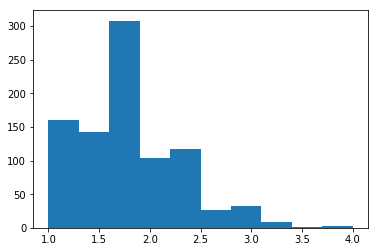

In [7]:
%matplotlib inline
plt.hist(labels_true)
y = np.bincount(labels_true.astype(int))
ii = np.nonzero(y)[0]
zip(ii,y[ii])

An issue is a low number of people in groups 3 and 4

## Possible solution, randomly sample equal numbers
Using the rule of thumb 2^m I need 8 people per cluster 
Possible combinations below

In [8]:
import math
x=math.factorial(70)
y=math.factorial(70-20)
fact=x/y
print(fact)

393849377343759797528386895216640000


## Create target variable (or the one you are comparing)

In [9]:
target_var=pd.DataFrame(lady_dudes['labels_true'].values)
subs_var=pd.DataFrame(subs)
target_var.shape

(903, 1)

## Impute missing values
This will not allow missing data, so have to impute nans

In [10]:
imputer = Imputer()
transformed_values = imputer.fit_transform(X)
# count the number of NaN values in each column
print(np.isnan(transformed_values).sum()) 
transformed_values_scale = scale(transformed_values)
transformed_values_scale.shape
#the target variable is the last variable
trans = np.column_stack((transformed_values_scale,subs,target_var.round(decimals=0)))

0


In [11]:
print(trans.shape)
trans[10,:]

(903, 14)


array([1.794456303524673, -0.9160012976566702, -0.8450545827601281, 0.0,
       0.0, 0.6021071251259197, 1.9996576547510394, 4.417977219002053,
       3.245935807081636, -0.8820291919726035, 1.8356440165628365e-15,
       -9.680805970204422e-15, 'NDAR_INV0C1ED337', 2.0], dtype=object)

## Function to randomly sample the data and perform the kmeans

In [12]:
def bench_k_means(estimator, name, data):
        t0 = time() #time
        estimator.fit(data) #estimating the fit 
        print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
              % (name, (time() - t0), estimator.inertia_,
                 metrics.homogeneity_score(labels, estimator.labels_),
                 metrics.completeness_score(labels, estimator.labels_),
                 metrics.v_measure_score(labels, estimator.labels_),
                 metrics.adjusted_rand_score(labels, estimator.labels_),
                 metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
                 metrics.silhouette_score(data, estimator.labels_,
                                          metric='euclidean',
                                          sample_size=sample_size)))


In [13]:
def meaner(**kwargs):
    for x in kwargs.items():
        print(x)
#     z=sum(*arg)/len(*arg)
#     return z

In [14]:
def PCA_reducer(DATA):
    n_samples, n_features = DATA.shape
    labels = np.round(targets)
    n_digits = len(np.unique(targets))
    sample_size=n_samples
    
    PCA_results = PCA(n_components=2)
    reduced_data = PCA_results.fit_transform(DATA)
    
    # Dump components relations with features:
    print pd.DataFrame(PCA_results.components_,index = ['PC-1','PC-2'])
    plt.semilogy(PCA_results.explained_variance_ratio_, '--o')
    return (PCA_results.components_, PCA_results.explained_variance_ratio_, 
            PCA_results.explained_variance_, PCA_results.mean_) 
    


In [15]:
def split_list(a_list):
        half = len(a_list)/2
        return a_list[:half], a_list[half:]

In [30]:
def random_selct(DATA):
    dictr = {}
    #defining the levels, based on the final column add the values to the dictionary
    levels = ['lev1','lev2','lev3']
    i=1
    for lev in levels:
        if i < len(levels)+1:
            dictr[lev] = DATA[np.where(DATA[:,-1] == i)]
            i=i+1
    '''
    make dictionaries to populate each run per parallel run
    '''
    rand_dict={}
    target_dict={}
    ind_dict={}
    sub_dict = {}
    '''
    subsetting the data and putting it into a dictionary
    '''
    for key, value in dictr.iteritems():
        #shuffle the data's index
        ind = np.random.permutation(value.shape[0])#random index
        #get the first 20 subjects indexes
        training_idx = ind[:50]#get 20 subjects indexes
        #get the first 20 subjects
        '''
        this needs to be the number of variables/factors you are expecting
        for females this is 12!!!!
        '''
        value_data = value[:,0:12]
        '''
        for females this is 13!!!!
        '''
        sub_data = value[:,12]
        print(sub_data)
        label_data = value[:,-1]
        training = value_data[training_idx,:]#select 20 subjects from the value in the dictionary
        subs = sub_data[training_idx]
        labels_true = label_data[training_idx]
        #saving the true labels
        target_dict[key] = labels_true #add targets to dictionary
        rand_dict[key] = training #match the randomized data to the ind_dict by key 
        ind_dict[key] = training_idx #add the indexes to the dictionary
        sub_dict[key] = subs
    '''
    combine all the dictionaries we have created thus far. 
    data, index, and targets
    '''    
    list_dicts = [rand_dict, target_dict, ind_dict, sub_dict]
    list_names  = ['rand_dict', 'target_dict', 'ind_dict', 'sub_dict']
    all_dicts = {}
    i = 0
    for d in list_dicts:
        all_dicts[list_names[i]] = list_dicts[i]
        i = i +1
#         print(all_dicts['rand_dict'])
   
    '''
    combine the randomized data by the actual level
    '''
    data=np.vstack((rand_dict['lev1'],rand_dict['lev2'],rand_dict['lev3']))
    '''
    defining the parameters for the k means and the PCA
    '''
    targets=np.hstack((target_dict['lev1'],target_dict['lev2'],target_dict['lev3']))
    targets = targets.astype('int')
    n_samples, n_features = data.shape
    n_digits = len(np.unique(targets))
    sample_size=n_samples
    '''
    defining the parameters for the k means
    '''    
    kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=300)
    ks=kmeans.fit_predict(data)
    indexes=np.hstack((ind_dict['lev1'],ind_dict['lev2'],ind_dict['lev3']))
    subses=np.hstack((sub_dict['lev1'],sub_dict['lev2'],sub_dict['lev3']))
    list_together = [indexes, subses, ks, targets,data]
    '''
    IMPORTANT ALL THE DATA INDEXED WITH SUBJECTS
    '''
    all_together = np.column_stack(list_together)
    print(all_together.shape)
    ###################################################
    
    
    ###########################################
    #            rebuild to combine data      #
    ###########################################
    comb_data = np.column_stack((data, kmeans.fit_predict(data)))
    comb_dictr = {}
    '''
    seperating the data based on the fit predict value (found right above)
    '''
    i=0
    for lev in levels:
        if i < len(levels)+1:
            comb_dictr[lev] = comb_data[np.where(comb_data[:,-1] == i)]
            i=i+1
    '''
    defining the parameters for the PCA and running the PCA 
    '''
    ###########################################
    #            PCA                          #
    ###########################################
    PCA_dict={}
    PCA_data={}
    PCA_final = {}

    for key, value in comb_dictr.iteritems():
        PCA_dict[key] = PCA(n_components=2)
        #make sure the last column which is the predicted label isn't included
        PCA_data[key] = PCA_dict[key].fit_transform(value[:,0:11])
        #make sure the last column which is the predicted label isn't included
        ID = np.identity(value[:,0:11].shape[1])  # identity matrix
        coef = PCA_dict[key].transform(ID)
        PCA_final[key] = coef
        
        
        plt.semilogy(PCA_dict[key].explained_variance_ratio_, '--o', label = '%s'%key)
        plt.legend()
        plt.subplot(1, 2, 2)

    reduced_data = PCA(n_components=2).fit_transform(data)
    kmeans.fit(reduced_data)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
    plt.subplot(1, 2, 1)
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
#     plt.show()
    
    ####THINGS TO SAVE#############################################################################        
    kmeans.fit(data)
    y_kmeans = kmeans.predict(data)
    clusters = kmeans.fit_predict(data)
    cluster_space = kmeans.fit_transform(data)
    
    
    
    centroids = kmeans.cluster_centers_   
    
    Components = np.vstack((PCA_dict['lev1'].components_,
                            PCA_dict['lev2'].components_,PCA_dict['lev3'].components_))
    
    Var_ratio = PCA_final
    
    lev1_VarRatio = np.vstack((PCA_final['lev1']))
    lev2_VarRatio = np.vstack((PCA_final['lev2']))
    lev3_VarRatio = np.vstack((PCA_final['lev3']))
    
    ind_dict = np.hstack((ind_dict['lev1'],
                            ind_dict['lev2'],ind_dict['lev3']))
    
    ########################################################################################################
    return (clusters, cluster_space,
            centroids,targets,
            all_together ,Components,
            Var_ratio, comb_data,
            lev1_VarRatio,lev2_VarRatio,lev3_VarRatio,
            kmeans,DATA)

# 0clusters
# 1cluster_space, 
# 2centroids, 
# 3targets, 
# 4all_dict,
# 5Components,
# 6Var_ratio, 
# 7full_data,
# 8lev1_VarRatio,
# 9lev2_VarRatio,
# 10lev3_VarRatio
# 11kmeans
# 12DATA

In [31]:
def main(i):
    names = ['pds_ht2_y',
'pds_skin2_y',
'pds_bdyhair_y',
'pds_m4_y',
'pds_m5_y',
'interview_age',
'anthroheightcalc', 
'anthroweightcalc',
'anthro_waist_cm',
'hormone_scr_dhea_mean',
'hormone_scr_hse_mean',
'labels_pred',
'labels_true']
    
    Clusters = []
    Cluster_space = []
    Centroids = []
    
    Comp = []
    Var_ratio = []
    
    Targets = []
    all_dicts = []
    
    Comb_data = []
    
    Lev1_VarRatio = []
    Lev2_VarRatio = []
    Lev3_VarRatio = []
    
    kmeans = []
    for x in range(0,i):
        print(x)
        Q = random_selct(trans)
        Clusters.append(Q[0])
        Cluster_space.append(Q[1])
        Centroids.append(Q[2])
        
        Targets.append(Q[3])
        all_dicts.append(Q[4])
        
        Comp.append(Q[5])
        Var_ratio.append(Q[6])
        
        Comb_data.append(Q[7])
        
        Lev1_VarRatio.append(Q[8].transpose())
        Lev2_VarRatio.append(Q[9].transpose())
        Lev3_VarRatio.append(Q[10].transpose())
        
        kmeans.append(Q[11])
        
    All_lev1Ratio = np.vstack(Lev1_VarRatio)
    All_lev2Ratio = np.vstack(Lev2_VarRatio)
    All_lev3Ratio = np.vstack(Lev3_VarRatio)
    
    All_clust = np.hstack(Clusters)
    All_clust_space = np.vstack(Cluster_space)
    
    All_labels = np.hstack(Targets)
    All_dicts = np.vstack(all_dicts)
    All_comp = np.vstack(Comp)
    All_var_ratio = Var_ratio
    All_data = np.vstack(Comb_data)
#     print(All_data)
#     print(All_data.shape)
    All_data=pd.DataFrame(data=All_data[1:,1:],index=All_data[1:,0])
    return (All_clust ,All_clust_space,
            All_labels , All_dicts,
            All_comp, All_var_ratio,
            All_data, names,
            All_lev1Ratio, All_lev2Ratio, All_lev3Ratio,
            kmeans, trans, All_dicts)
i = 2
FINAL = []

if __name__ == "__main__": 
    pool = Pool(processes=2)
    FINAL = pool.map(main, (i,i)) 

0
0
['NDAR_INV0AEBMADL' 'NDAR_INV0RHLKA9M' 'NDAR_INV0W4WA8RV'
 'NDAR_INV0XDBADBW' 'NDAR_INV16MGA6G5' 'NDAR_INV1AA2VG9C'
 'NDAR_INV1JERB432' 'NDAR_INV2B2ZBYTJ' 'NDAR_INV2U88LX3T'
 'NDAR_INV39Z1U19N' 'NDAR_INV3XL11J4W' 'NDAR_INV48NE3N41'
 'NDAR_INV4DVGGJE9' 'NDAR_INV4EKBZJTW' 'NDAR_INV52CVLNFF'
 'NDAR_INV69UKEYVY' 'NDAR_INV6HZWUM71' 'NDAR_INV6VUN0VRU'
 'NDAR_INVA01DRNBZ' 'NDAR_INVA3G711KJ' 'NDAR_INVA70DPKY0'
 'NDAR_INVAUGA1ZYM' 'NDAR_INVBC53RFDD' 'NDAR_INVBFEWTU2N'
 'NDAR_INVBJM8ABYZ' 'NDAR_INVC7HBE7N7' 'NDAR_INVD9L81NY5'
 'NDAR_INVDZKEBE4K' 'NDAR_INVF1E6TJJ9' 'NDAR_INVF4PLLUF8'
 'NDAR_INVF6553H6E' 'NDAR_INVFDCGB66W' 'NDAR_INVFLPJWCHN'
 'NDAR_INVFUL1CNV5' 'NDAR_INVG7MJ6VJM' 'NDAR_INVGALZWY31'
 'NDAR_INVGCFRP15A' 'NDAR_INVGFH7TNNH' 'NDAR_INVGVW71W09'
 'NDAR_INVH218767E' 'NDAR_INVHJAUY52L' 'NDAR_INVHXHGMVPP'
 'NDAR_INVJAL1KX4A' 'NDAR_INVL36MC5HJ' 'NDAR_INVL6J5NEVL'
 'NDAR_INVLCMDKYGP' 'NDAR_INVLE343UAX' 'NDAR_INVLK12P4A5'
 'NDAR_INVMA0MXL96' 'NDAR_INVMZKNKER7' 'NDAR_INVN98L0THW'
 'NDAR_INV

 'NDAR_INVZZZ2ALR6']['NDAR_INV028D3ELL' 'NDAR_INV02H7G2T6' 'NDAR_INV05T64PXD'
 'NDAR_INV0C1ED337' 'NDAR_INV0C765WK4' 'NDAR_INV0CP9XGTP'
 'NDAR_INV0D83M5VE' 'NDAR_INV0DBRJXKG' 'NDAR_INV0EV57VEX'
 'NDAR_INV0GUTM6AM' 'NDAR_INV0GZM9UZJ' 'NDAR_INV0J6LY05U'
 'NDAR_INV0JWEE23L' 'NDAR_INV0KPZW3NB' 'NDAR_INV0MRY4Z3E'
 'NDAR_INV0P0GTDY0' 'NDAR_INV0PHTY15N' 'NDAR_INV0UYDV4HJ'
 'NDAR_INV0WC5U4JA' 'NDAR_INV0XVGNCYR' 'NDAR_INV114VT9DX'
 'NDAR_INV11E1FCZ0' 'NDAR_INV13276WYW' 'NDAR_INV137Y0WR8'
 'NDAR_INV139PZ31D' 'NDAR_INV14PHMUNU' 'NDAR_INV1535421B'
 'NDAR_INV16RVU5PF' 'NDAR_INV17K4X0WD' 'NDAR_INV1962GTLL'
 'NDAR_INV1F953XCP' 'NDAR_INV1JWGJFFK' 'NDAR_INV1KBEC5AT'
 'NDAR_INV1KWBW4RD' 'NDAR_INV1MFM0HL1' 'NDAR_INV1MKWVMP1'
 'NDAR_INV1X8K8NC3' 'NDAR_INV1XDPJKBE' 'NDAR_INV1Y1Z29D0'
 'NDAR_INV1Y40DZT8' 'NDAR_INV1YFEDW44' 'NDAR_INV1Z2F3AA0'
 'NDAR_INV1ZZAPY9K' 'NDAR_INV20CNYBBC' 'NDAR_INV22F4J621'
 'NDAR_INV22LW15TV' 'NDAR_INV24LWV4C5' 'NDAR_INV26K18JMC'
 'NDAR_INV27CF9R4C' 'NDAR_INV29299DLJ' 'NDAR_INV2AKU

 'NDAR_INVZZZ2ALR6']

['NDAR_INV00X2TBWJ' 'NDAR_INV03NW0RKL' 'NDAR_INV07RAHHYH'
 'NDAR_INV09T2EBX4' 'NDAR_INV0A9K5L4R' 'NDAR_INV0B7UGM1D'
 'NDAR_INV0D0C239B' 'NDAR_INV0DVK13LU' 'NDAR_INV0L3VJZEL'
 'NDAR_INV0UPVEC1J' 'NDAR_INV0V139J8T' 'NDAR_INV14AFR5D4'
 'NDAR_INV14UJARAJ' 'NDAR_INV173ZYYKX' 'NDAR_INV1BUXN6LH'
 'NDAR_INV1DZWFKCG' 'NDAR_INV1ET4JE3B' 'NDAR_INV1FW43D9V'
 'NDAR_INV1GDR72XA' 'NDAR_INV1VCGLA8W' 'NDAR_INV1ZY11ZP0'
 'NDAR_INV215XKL9U' 'NDAR_INV24534L6F' 'NDAR_INV26V2CZ6Z'
 'NDAR_INV2BPVXTH3' 'NDAR_INV2DLW1KXL' 'NDAR_INV2E8R4820'
 'NDAR_INV2MH3HPHP' 'NDAR_INV2P5N7AMV' 'NDAR_INV2UKALPPX'
 'NDAR_INV2ZLBBMTU' 'NDAR_INV3062KMFL' 'NDAR_INV33AC40WZ'
 'NDAR_INV36ZD3NZC' 'NDAR_INV3B1CZ5GM' 'NDAR_INV3DG9GH8G'
 'NDAR_INV3H5M0JJR' 'NDAR_INV3HEHP1P4' 'NDAR_INV3MLPX0CG'
 'NDAR_INV3NA8KUJ2' 'NDAR_INV3R6TY43Y' 'NDAR_INV3V7GL5Z2'
 'NDAR_INV3WA4PYL5' 'NDAR_INV3X41ZHVL' 'NDAR_INV459DR5EV'
 'NDAR_INV46VFKP3F' 'NDAR_INV4AYYAKWZ' 'NDAR_INV4B1YV01D'
 'NDAR_INV4BB6Z0VU' 'NDAR_INV4G19G9J8' 'NDAR_INV4H

 'NDAR_INVZUJYFZPW' 'NDAR_INVZVGAMFG7']

(150, 16)
(150, 16)


/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


1
['NDAR_INV0AEBMADL' 'NDAR_INV0RHLKA9M' 'NDAR_INV0W4WA8RV'
 'NDAR_INV0XDBADBW' 'NDAR_INV16MGA6G5' 'NDAR_INV1AA2VG9C'
 'NDAR_INV1JERB432' 'NDAR_INV2B2ZBYTJ' 'NDAR_INV2U88LX3T'
 'NDAR_INV39Z1U19N' 'NDAR_INV3XL11J4W' 'NDAR_INV48NE3N41'
 'NDAR_INV4DVGGJE9' 'NDAR_INV4EKBZJTW' 'NDAR_INV52CVLNFF'
 'NDAR_INV69UKEYVY' 'NDAR_INV6HZWUM71' 'NDAR_INV6VUN0VRU'
 'NDAR_INVA01DRNBZ' 'NDAR_INVA3G711KJ' 'NDAR_INVA70DPKY0'
 'NDAR_INVAUGA1ZYM' 'NDAR_INVBC53RFDD' 'NDAR_INVBFEWTU2N'
 'NDAR_INVBJM8ABYZ' 'NDAR_INVC7HBE7N7' 'NDAR_INVD9L81NY5'
 'NDAR_INVDZKEBE4K' 'NDAR_INVF1E6TJJ9' 'NDAR_INVF4PLLUF8'
 'NDAR_INVF6553H6E' 'NDAR_INVFDCGB66W' 'NDAR_INVFLPJWCHN'
 'NDAR_INVFUL1CNV5' 'NDAR_INVG7MJ6VJM' 'NDAR_INVGALZWY31'
 'NDAR_INVGCFRP15A' 'NDAR_INVGFH7TNNH' 'NDAR_INVGVW71W09'
 'NDAR_INVH218767E' 'NDAR_INVHJAUY52L' 'NDAR_INVHXHGMVPP'
 'NDAR_INVJAL1KX4A' 'NDAR_INVL36MC5HJ' 'NDAR_INVL6J5NEVL'
 'NDAR_INVLCMDKYGP' 'NDAR_INVLE343UAX' 'NDAR_INVLK12P4A5'
 'NDAR_INVMA0MXL96' 'NDAR_INVMZKNKER7' 'NDAR_INVN98L0THW'
 'NDAR_INVP4

 'NDAR_INVZZZ2ALR6']
['NDAR_INV00X2TBWJ' 'NDAR_INV03NW0RKL' 'NDAR_INV07RAHHYH'
 'NDAR_INV09T2EBX4' 'NDAR_INV0A9K5L4R' 'NDAR_INV0B7UGM1D'
 'NDAR_INV0D0C239B' 'NDAR_INV0DVK13LU' 'NDAR_INV0L3VJZEL'
 'NDAR_INV0UPVEC1J' 'NDAR_INV0V139J8T' 'NDAR_INV14AFR5D4'
 'NDAR_INV14UJARAJ' 'NDAR_INV173ZYYKX' 'NDAR_INV1BUXN6LH'
 'NDAR_INV1DZWFKCG' 'NDAR_INV1ET4JE3B' 'NDAR_INV1FW43D9V'
 'NDAR_INV1GDR72XA' 'NDAR_INV1VCGLA8W' 'NDAR_INV1ZY11ZP0'
 'NDAR_INV215XKL9U' 'NDAR_INV24534L6F' 'NDAR_INV26V2CZ6Z'
 'NDAR_INV2BPVXTH3' 'NDAR_INV2DLW1KXL' 'NDAR_INV2E8R4820'
 'NDAR_INV2MH3HPHP' 'NDAR_INV2P5N7AMV' 'NDAR_INV2UKALPPX'
 'NDAR_INV2ZLBBMTU' 'NDAR_INV3062KMFL' 'NDAR_INV33AC40WZ'
 'NDAR_INV36ZD3NZC' 'NDAR_INV3B1CZ5GM' 'NDAR_INV3DG9GH8G'
 'NDAR_INV3H5M0JJR' 'NDAR_INV3HEHP1P4' 'NDAR_INV3MLPX0CG'
 'NDAR_INV3NA8KUJ2' 'NDAR_INV3R6TY43Y' 'NDAR_INV3V7GL5Z2'
 'NDAR_INV3WA4PYL5' 'NDAR_INV3X41ZHVL' 'NDAR_INV459DR5EV'
 'NDAR_INV46VFKP3F' 'NDAR_INV4AYYAKWZ' 'NDAR_INV4B1YV01D'
 'NDAR_INV4BB6Z0VU' 'NDAR_INV4G19G9J8' 'NDAR_INV4HW

 'NDAR_INVZZZ2ALR6']
['NDAR_INV00X2TBWJ' 'NDAR_INV03NW0RKL' 'NDAR_INV07RAHHYH'
 'NDAR_INV09T2EBX4' 'NDAR_INV0A9K5L4R' 'NDAR_INV0B7UGM1D'
 'NDAR_INV0D0C239B' 'NDAR_INV0DVK13LU' 'NDAR_INV0L3VJZEL'
 'NDAR_INV0UPVEC1J' 'NDAR_INV0V139J8T' 'NDAR_INV14AFR5D4'
 'NDAR_INV14UJARAJ' 'NDAR_INV173ZYYKX' 'NDAR_INV1BUXN6LH'
 'NDAR_INV1DZWFKCG' 'NDAR_INV1ET4JE3B' 'NDAR_INV1FW43D9V'
 'NDAR_INV1GDR72XA' 'NDAR_INV1VCGLA8W' 'NDAR_INV1ZY11ZP0'
 'NDAR_INV215XKL9U' 'NDAR_INV24534L6F' 'NDAR_INV26V2CZ6Z'
 'NDAR_INV2BPVXTH3' 'NDAR_INV2DLW1KXL' 'NDAR_INV2E8R4820'
 'NDAR_INV2MH3HPHP' 'NDAR_INV2P5N7AMV' 'NDAR_INV2UKALPPX'
 'NDAR_INV2ZLBBMTU' 'NDAR_INV3062KMFL' 'NDAR_INV33AC40WZ'
 'NDAR_INV36ZD3NZC' 'NDAR_INV3B1CZ5GM' 'NDAR_INV3DG9GH8G'
 'NDAR_INV3H5M0JJR' 'NDAR_INV3HEHP1P4' 'NDAR_INV3MLPX0CG'
 'NDAR_INV3NA8KUJ2' 'NDAR_INV3R6TY43Y' 'NDAR_INV3V7GL5Z2'
 'NDAR_INV3WA4PYL5' 'NDAR_INV3X41ZHVL' 'NDAR_INV459DR5EV'
 'NDAR_INV46VFKP3F' 'NDAR_INV4AYYAKWZ' 'NDAR_INV4B1YV01D'
 'NDAR_INV4BB6Z0VU' 'NDAR_INV4G19G9J8' 'NDAR_INV4HW

In [32]:
(FINAL[0][1])

array([[  8.04936609,   1.94112522,   3.7811721 ],
       [  8.64806036,   2.0645241 ,   5.16449273],
       [  8.12217565,   1.89184972,   3.97497067],
       [  8.38971764,   1.88449162,   4.65984175],
       [  8.45463152,   3.10948509,   3.62395153],
       [  8.09565979,   2.3372953 ,   3.43132254],
       [ 11.33037691,   6.32160365,   8.88043832],
       [  8.72422689,   2.2153282 ,   5.26184018],
       [  9.13761474,   2.79814938,   5.93677729],
       [  9.03968419,   2.6291772 ,   5.86779523],
       [  8.96440141,   2.62327773,   5.35117162],
       [  8.19266274,   2.35654884,   3.85104208],
       [  8.92495182,   2.48787546,   5.03980958],
       [  8.28241458,   1.39676953,   4.11494119],
       [  8.58675109,   1.84851136,   4.84424724],
       [  8.65031447,   2.62954619,   4.64593914],
       [  8.27259036,   1.89432833,   4.38354441],
       [  8.85129997,   2.67120547,   5.41932564],
       [  8.32376908,   2.68074489,   3.985797  ],
       [  8.93554051,   2.46529

In [33]:
variables = ['All_clust' ,'All_clust_space',
             'All_labels' , 'All_dat',
             'All_comp', 'All_var_ratio',
             'All_data', 'names',
             'All_lev1Ratio', 'All_lev2Ratio',
             'All_lev3Ratio', 'kmeans', 'DATA','All_dicts']
# a, b in x

dict1 ={}
dict2 ={}
dicts = [dict1, dict2]
print(len(FINAL))
i=0
for item in FINAL:
    dicti = dicts[i]
    i=i+1
    ii= 0
    for value in item:
        dicti[variables[ii]] = value
        ii=ii+1

2


In [34]:
dict2['All_dat']

array([[229, 'NDAR_INVPCVL3NDJ', 0, ..., -0.8820291919726035,
        1.8356440165628365e-15, -9.680805970204422e-15],
       [18, 'NDAR_INV1GDR72XA', 0, ..., -0.8820291919726035,
        1.8356440165628365e-15, -9.680805970204422e-15],
       [221, 'NDAR_INVNE28ULRV', 0, ..., -0.8245828333764379,
        1.8356440165628365e-15, -9.680805970204422e-15],
       ..., 
       [31, 'NDAR_INVFDCGB66W', 1, ..., -0.8820291919726035,
        1.8356440165628365e-15, -9.680805970204422e-15],
       [22, 'NDAR_INVBC53RFDD', 0, ..., -0.8820291919726035,
        1.8356440165628365e-15, -9.680805970204422e-15],
       [29, 'NDAR_INVF4PLLUF8', 0, ..., -0.5542470282180116,
        -0.07934287304964305, 1.2299954982508388]], dtype=object)

In [35]:
ds = [dict1, dict2]
d = {}
for k in dict1.iterkeys():
    d[k] = tuple(d[k] for d in ds)

All_lev1Ratio = np.vstack(d['All_lev1Ratio'])
All_lev2Ratio = np.vstack(d['All_lev2Ratio'])
All_lev3Ratio = np.vstack(d['All_lev3Ratio'])

All_clust = np.hstack(d['All_clust'])
All_clust_space = np.vstack(d['All_clust_space'])

All_labels = np.hstack(d['All_labels'])
# All_index = np.hstack(d['All_index'])

All_comp = np.vstack(d['All_comp'])
# All_var_ratio = Var_ratio

All_data = dict1['All_data'].reset_index().merge(dict2['All_data'], how="left").set_index('index')

All_DATA = np.vstack(d['DATA'])

All_dat = np.vstack(d['All_dat'])


In [36]:
names = ['index', 'sub','predicted', 'real','pds_ht2_y',
'pds_skin2_y',
'pds_bdyhair_y',
'pds_m4_y',
'pds_m5_y',
'interview_age',
'anthroheightcalc', 
'anthroweightcalc',
'anthro_waist_cm',
'hormone_scr_dhea_mean',
'hormone_scr_hse_mean',
'hormone_scr_ert_mean']
all_dat = pd.DataFrame(All_dat)
all_dat.columns = names
all_dat.set_index('index')

,sub,predicted,real,pds_ht2_y,pds_skin2_y,pds_bdyhair_y,pds_m4_y,pds_m5_y,interview_age,anthroheightcalc,anthroweightcalc,anthro_waist_cm,hormone_scr_dhea_mean,hormone_scr_hse_mean,hormone_scr_ert_mean
index,,,,,,,,,,,,,,,
229,NDAR_INVPCVL3NDJ,0,1,0.65011,-0.916001,-0.845055,0,0,0.602107,0.277694,-0.538502,-0.428673,-0.882029,1.83564e-15,-9.68081e-15
18,NDAR_INV1GDR72XA,0,1,-0.494236,-0.916001,-0.845055,0,0,-0.92087,-1.48919,-1.10436,-0.848629,-0.882029,1.83564e-15,-9.68081e-15
221,NDAR_INVNE28ULRV,0,1,-0.494236,-0.916001,-0.845055,0,0,0.463655,0.80177,-0.268149,-0.785635,-0.824583,1.83564e-15,-9.68081e-15
94,NDAR_INV8M6XN83T,0,1,-0.494236,-0.916001,0.32532,0,0,-1.05932,-0.995062,-0.624428,-0.74364,0.0359861,-0.257533,-1.11042
245,NDAR_INVRCHTJK34,0,1,-1.63858,0.380471,-0.845055,0,0,0.18675,0.502298,0.897096,1.25115,1.14436,-0.304888,1.19437
251,NDAR_INVRXEE3K3Y,0,1,0.65011,-0.916001,-0.845055,0,0,-0.505512,0.292668,0.228547,1.04117,-0.882029,1.83564e-15,-9.68081e-15
283,NDAR_INVXXZTK34K,0,1,-0.494236,-0.916001,-0.845055,0,0,-1.05932,-5.75667,-1.19867,-1.1636,-0.861754,-0.461243,-2.69824
261,NDAR_INVUP3WUX7T,0,1,-0.494236,-0.916001,-0.845055,0,0,-1.19777,-1.59401,-1.07292,-0.533662,1.26376,-0.155992,0.281488
127,NDAR_INVCZKCFP32,0,1,-0.494236,-0.916001,-0.845055,0,0,-1.05932,-1.51914,-1.19867,-1.74103,-0.216327,-0.387019,-1.48802


## Taking the variance from each K mean cluster and PCA, using PCA to find the most important factors over all

Lev3
      pds_ht2_y  pds_skin2_y  pds_bdyhair_y  pds_m4_y  pds_m5_y  \
PC-1   0.319952     0.248455       0.275925  0.310652  0.310652   
PC-2  -0.077473     0.406588       0.163662  0.134776  0.134776   

      interview_age  anthroheightcalc  anthroweightcalc  anthro_waist_cm  \
PC-1       0.340227          0.323923          0.271579         0.265556   
PC-2      -0.389222         -0.268681         -0.381552        -0.318796   

      hormone_scr_dhea_mean  hormone_scr_hse_mean  
PC-1               0.326984              0.308032  
PC-2               0.535429              0.089381  




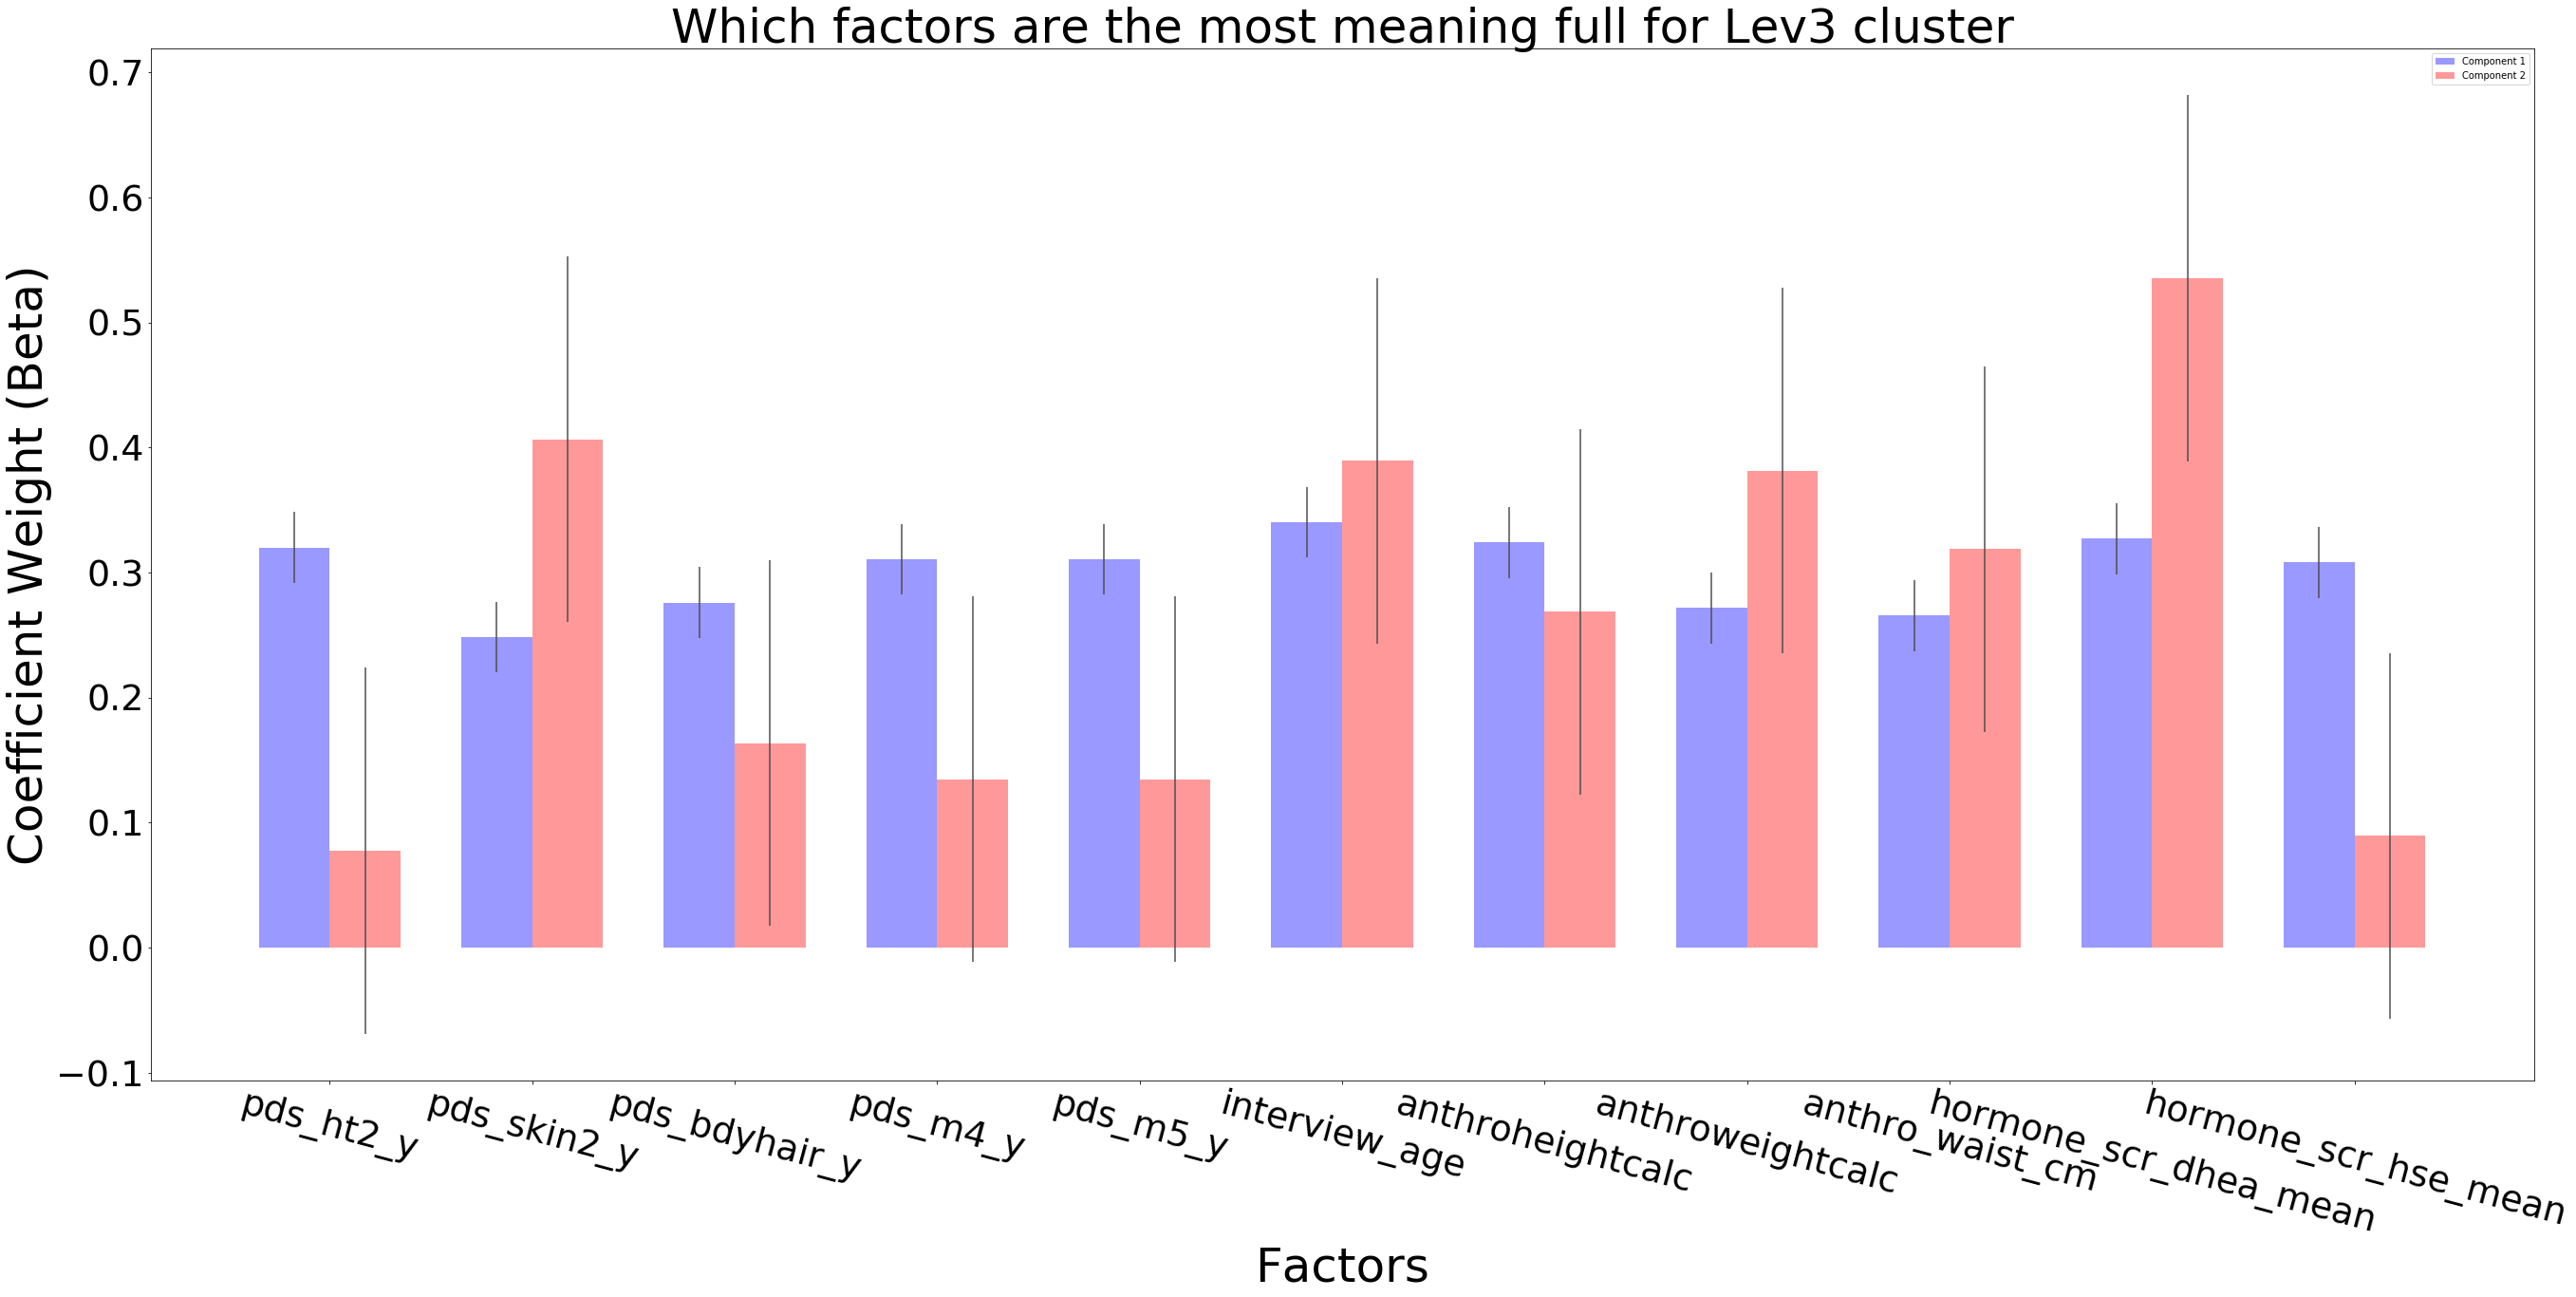

Lev2
      pds_ht2_y  pds_skin2_y  pds_bdyhair_y  pds_m4_y  pds_m5_y  \
PC-1   0.091576     0.297532       0.198393  0.334699  0.334699   
PC-2  -0.215933    -0.334721      -0.507247 -0.078630 -0.078630   

      interview_age  anthroheightcalc  anthroweightcalc  anthro_waist_cm  \
PC-1       0.387409          0.217688          0.123755         0.187591   
PC-2       0.434833          0.352510          0.382044         0.311039   

      hormone_scr_dhea_mean  hormone_scr_hse_mean  
PC-1               0.539158              0.317823  
PC-2              -0.105551             -0.066961  




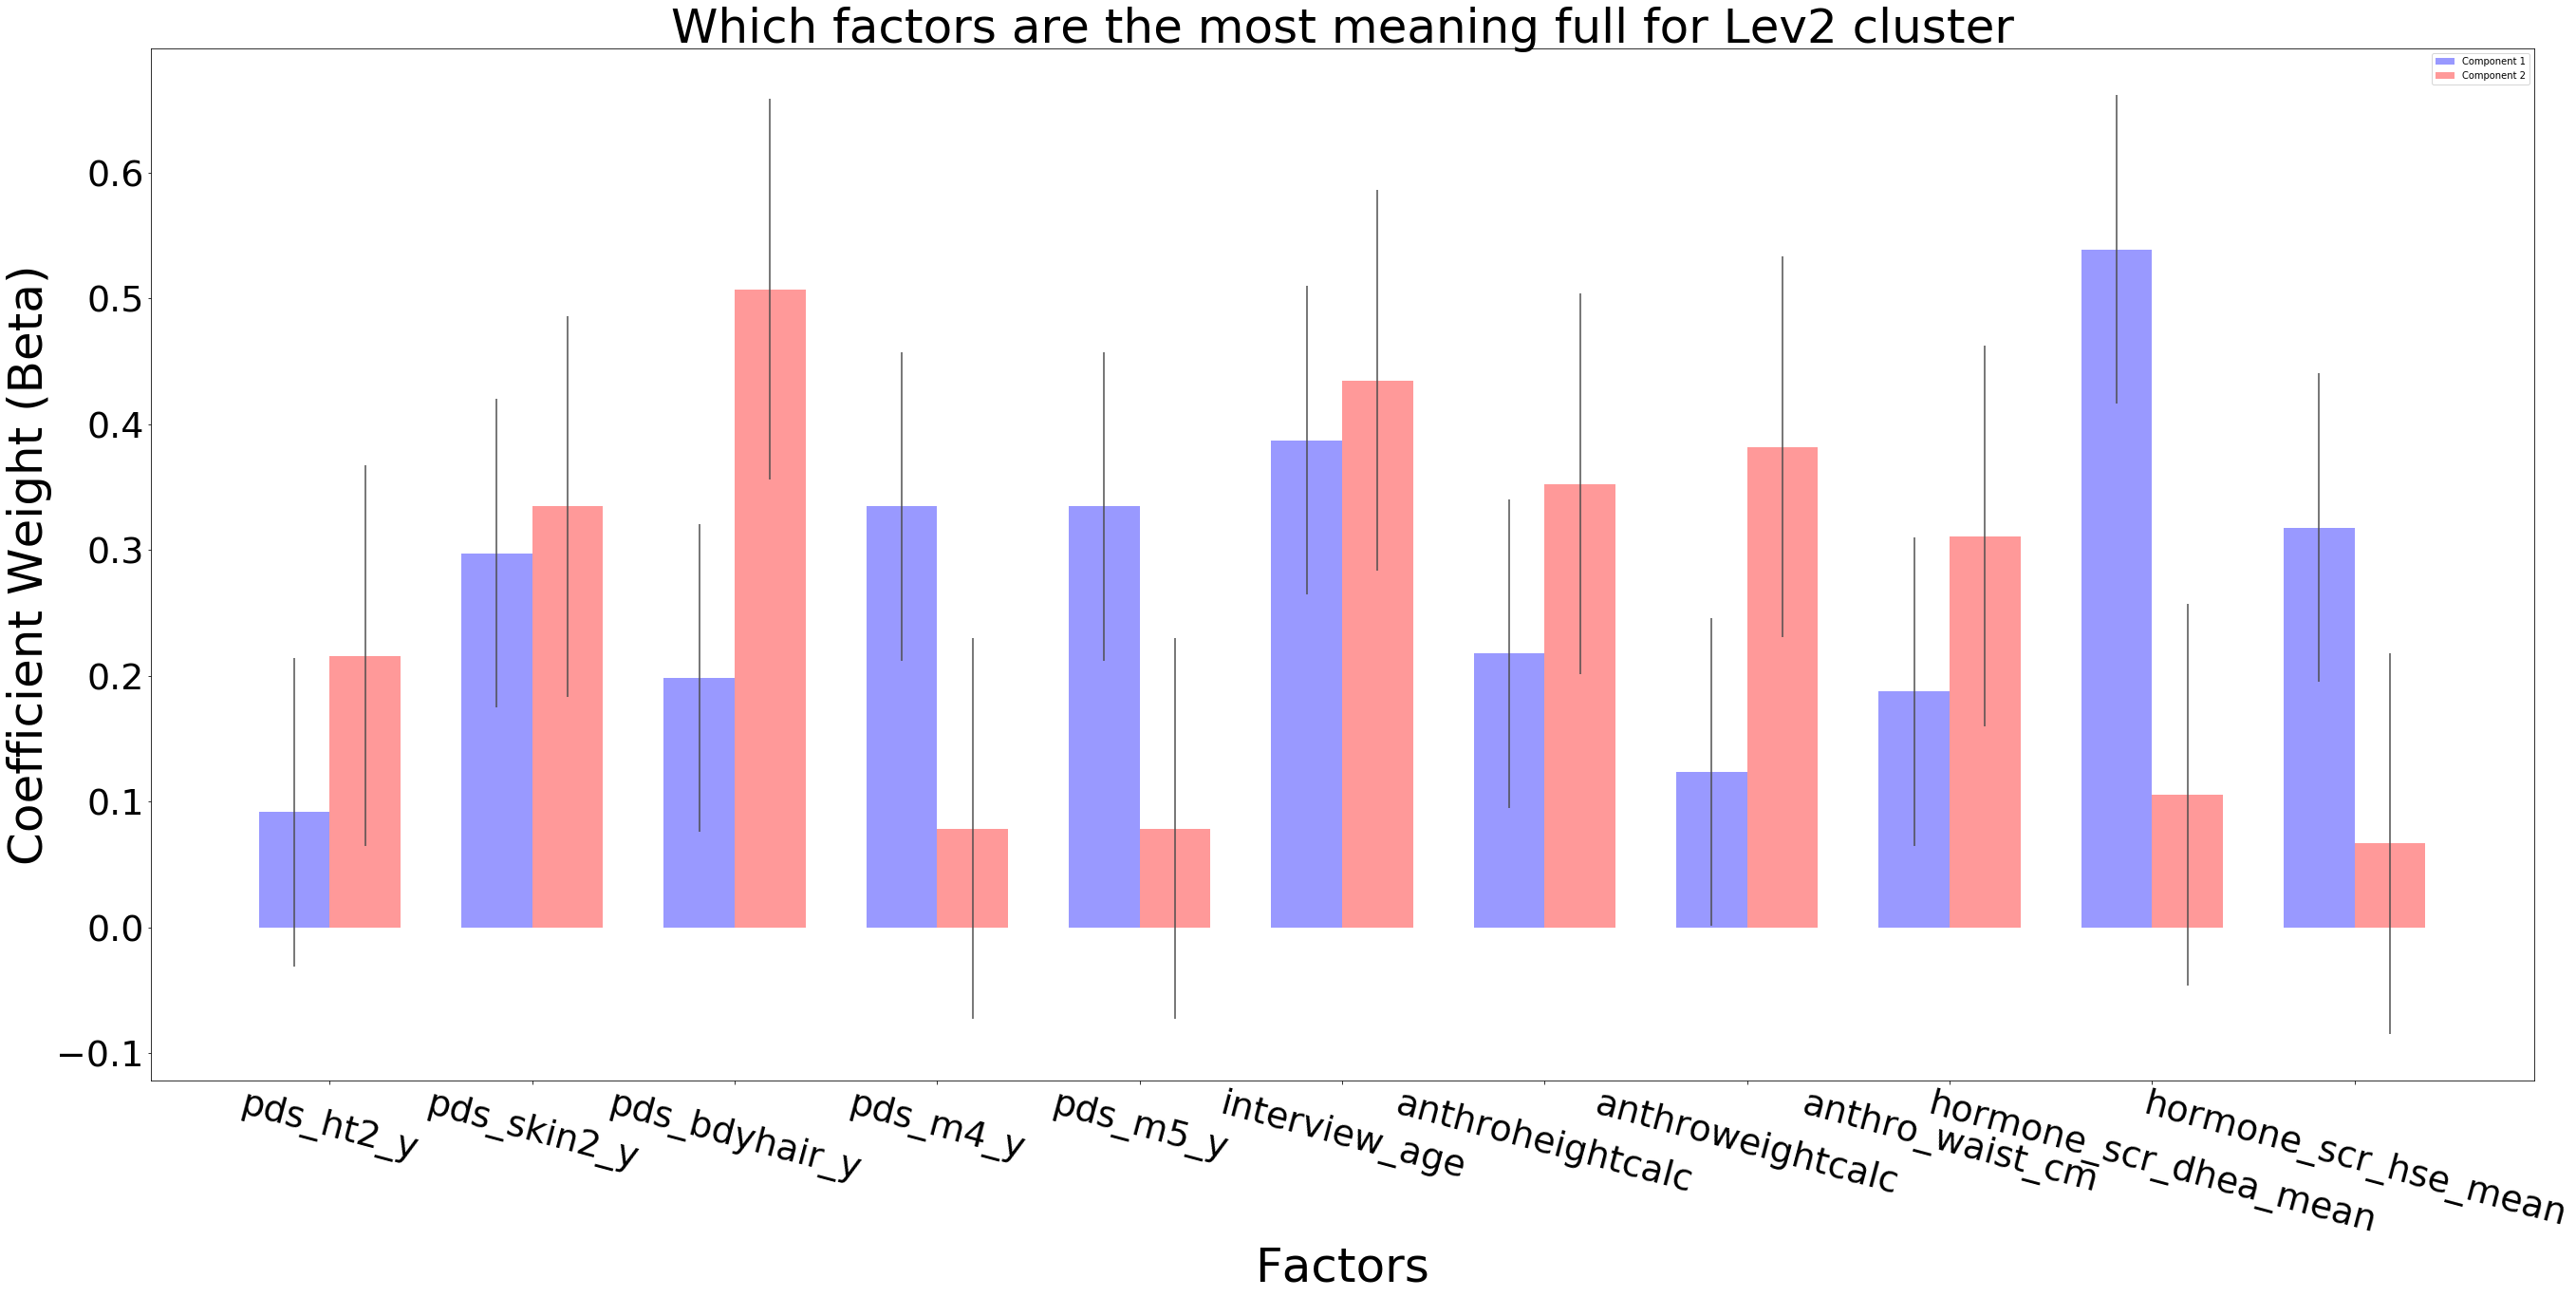

Lev1
      pds_ht2_y  pds_skin2_y  pds_bdyhair_y  pds_m4_y  pds_m5_y  \
PC-1   0.293853     0.307081       0.308736  0.297883  0.297883   
PC-2   0.403030     0.436304       0.577642 -0.130221 -0.130221   

      interview_age  anthroheightcalc  anthroweightcalc  anthro_waist_cm  \
PC-1       0.318906          0.313728          0.304568         0.300674   
PC-2      -0.310268         -0.147400         -0.091211        -0.318870   

      hormone_scr_dhea_mean  hormone_scr_hse_mean  
PC-1               0.315451              0.252515  
PC-2              -0.106750             -0.200582  




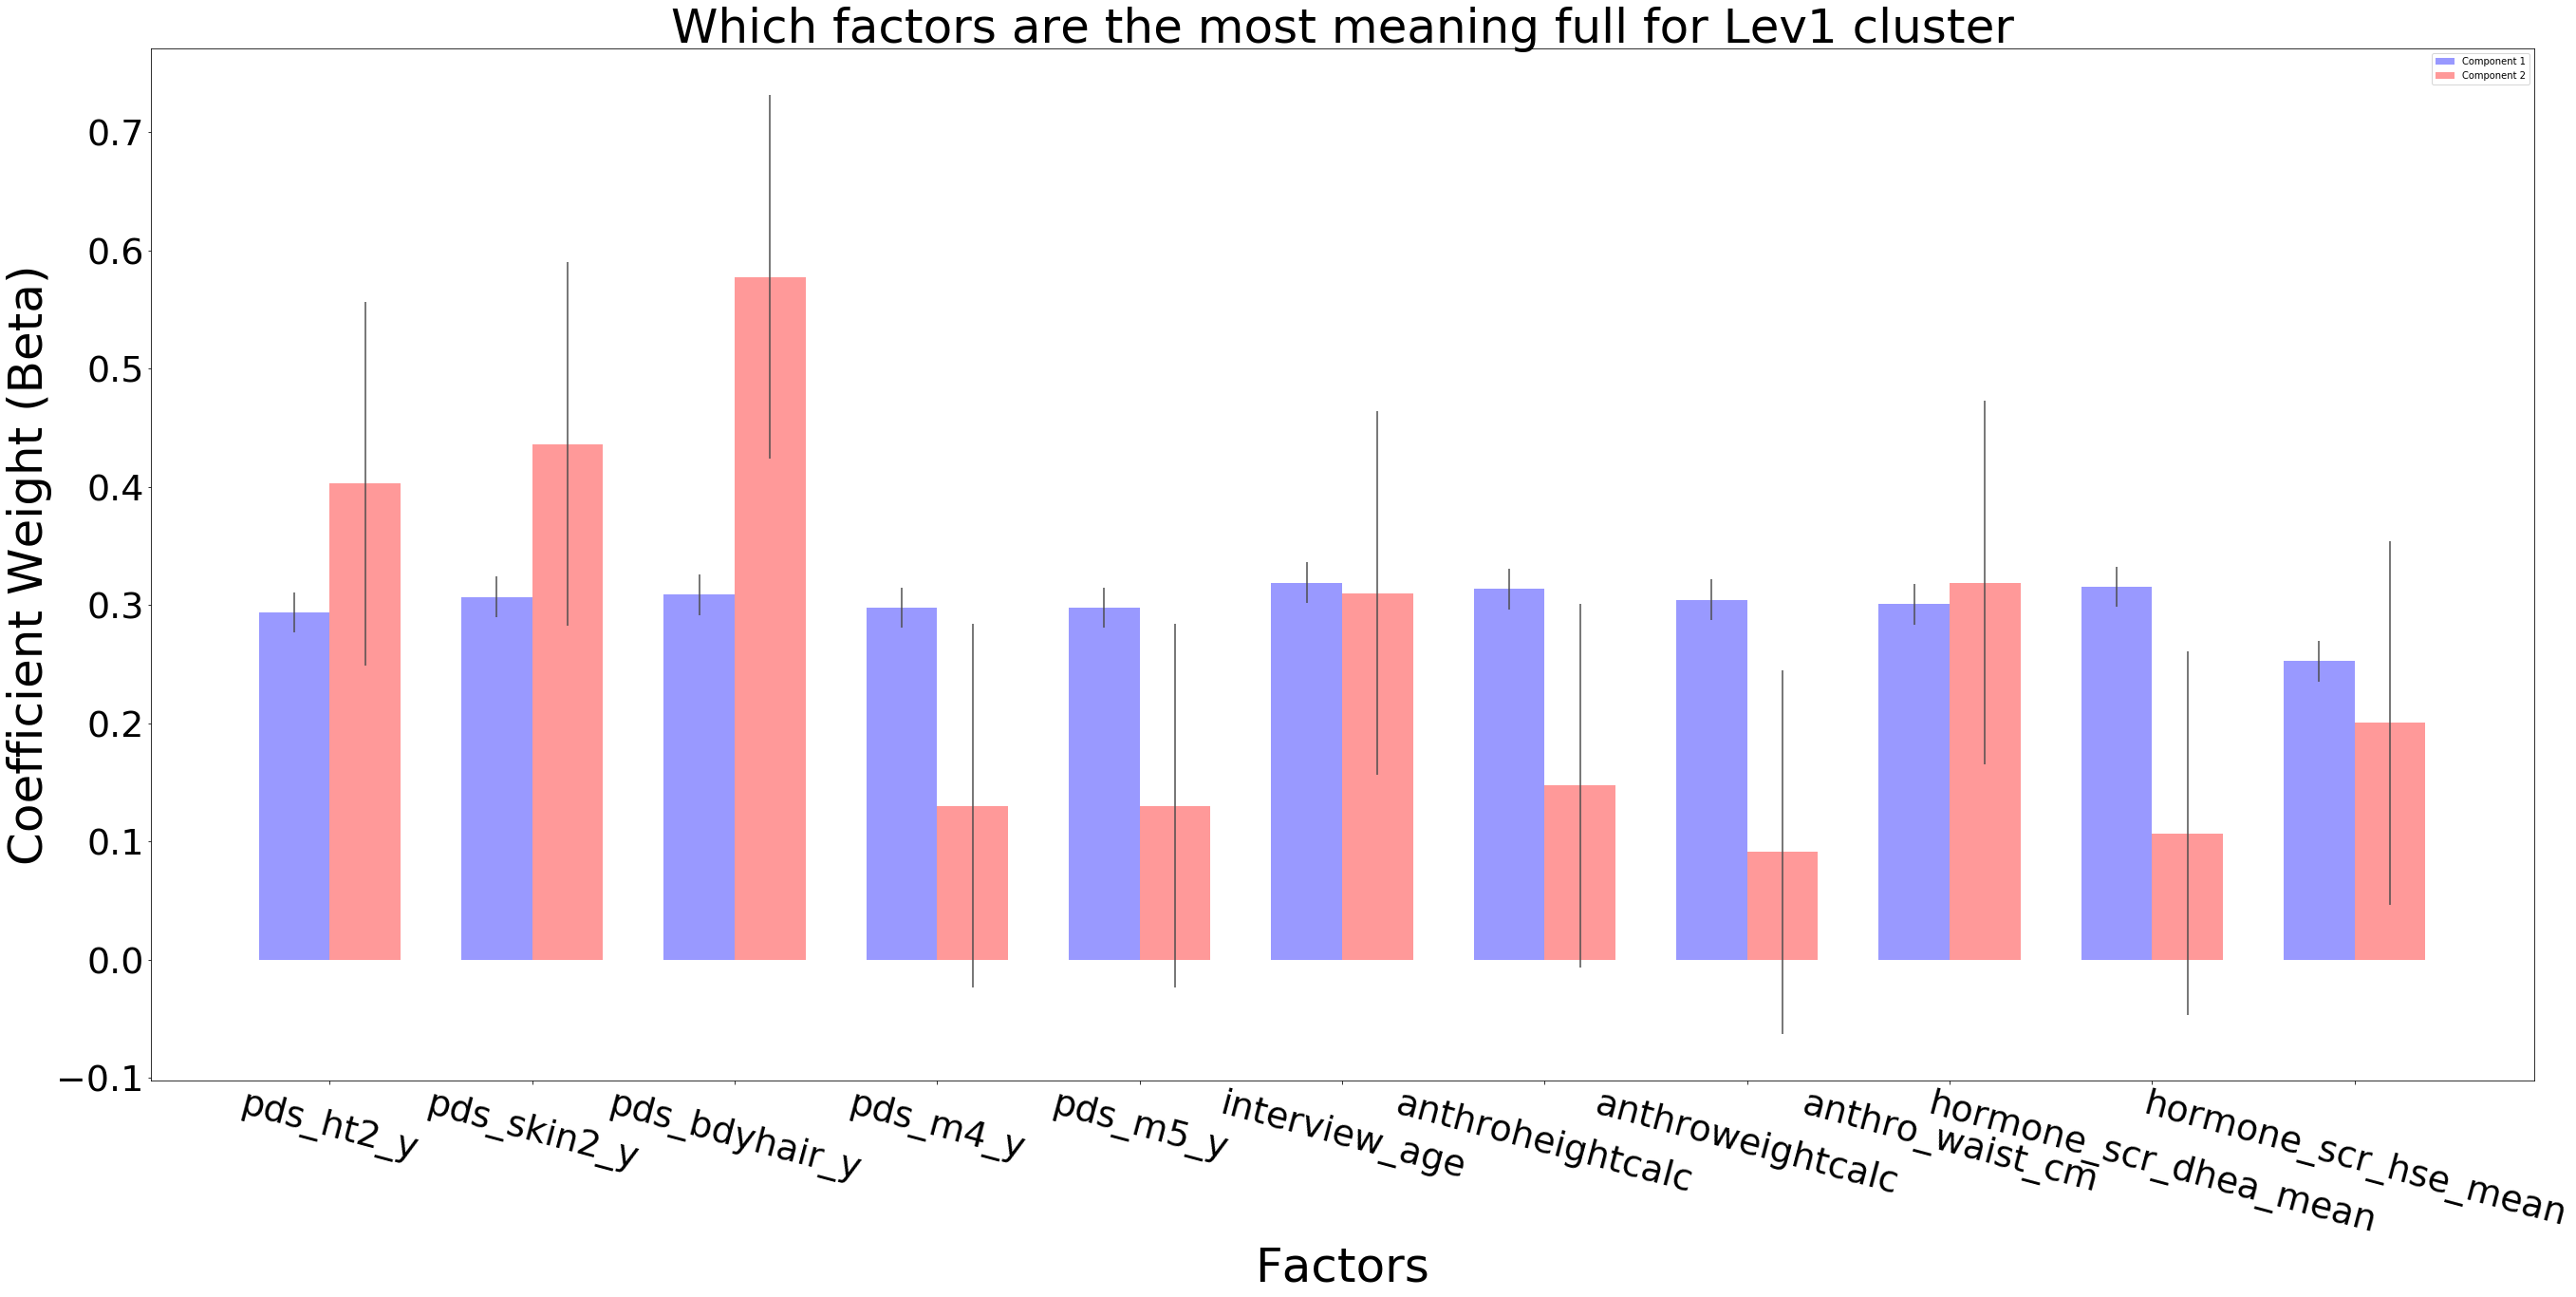

In [37]:
names=['pds_ht2_y',
'pds_skin2_y',
'pds_bdyhair_y',
'pds_m4_y',
'pds_m5_y',
'interview_age',
'anthroheightcalc', 
'anthroweightcalc',
'anthro_waist_cm',
'hormone_scr_dhea_mean',
'hormone_scr_hse_mean']

All_Ratios = {'Lev1': All_lev1Ratio, 'Lev2': All_lev2Ratio, 'Lev3':All_lev3Ratio}
Coefs = {}
index = np.arange(11)
for key, value in All_Ratios.iteritems(): 
    pca = PCA(n_components=2)
    pca.fit_transform(value)
    i = np.identity(value.shape[1])  # identity matrix
    Coefs[key] = pca.transform(i)
    print(key)
    print pd.DataFrame(pca.components_,columns=names[0:11],index = ['PC-1','PC-2'])
    print('\n')
    
    n_groups = 11

    means_CP1 = np.absolute(pca.components_[0,:])
    std_CP1 = np.matrix.std(np.matrix(np.absolute(pca.components_[0,:])))

    means_CP2 = np.absolute(pca.components_[1,:])
    std_CP2 = np.matrix.std(np.matrix(np.absolute(pca.components_[1,:])))

    fig, ax = plt.subplots(figsize=(45, 20))
    bar_width = 0.35

    opacity = 0.4
    error_config = {'ecolor': '0.3'}

    rects1 = ax.bar(index, means_CP1, bar_width,
                    alpha=opacity, color='b',
                    yerr=std_CP1, error_kw=error_config,
                    label='Component 1')

    rects2 = ax.bar(index + bar_width, means_CP2, bar_width,
                    alpha=opacity, color='r',
                    yerr=std_CP2, error_kw=error_config,
                    label='Component 2')
    #plt.xlabel( fontsize=18)
    ax.set_xlabel('Factors', fontsize = 50)
    ax.set_ylabel('Coefficient Weight (Beta)', fontsize = 50)
    ax.set_title('Which factors are the most meaning full for %s cluster'%key, fontsize = 50)
    ax.set_xticks(index + bar_width / 2)
    
    ax.set_xticklabels(names[0:11], fontsize = 28, rotation = -15)
    ax.legend()
    ax.tick_params(labelsize = 38)

    fig=plt.figure(figsize=(100, 16), dpi= 80, facecolor='w', edgecolor='k')
    fig.tight_layout()
    plt.show()
    

## Looking at the data

merging the original and new data sets on the indexes

In [38]:
all_dat['real'].describe()

count     600
unique      3
top         3
freq      200
Name: real, dtype: int64

In [40]:
testData = pd.DataFrame(data = lady_dudes)
testData
# print(dudes)
# print(testData) 
total_g=pd.merge(all_dat, testData, on = ['sub'], how = 'outer')

In [49]:
colz=list(total_g.columns.values)
colz[2:]

['predicted',
 'real',
 'pds_ht2_y_x',
 'pds_skin2_y_x',
 'pds_bdyhair_y_x',
 'pds_m4_y_x',
 'pds_m5_y_x',
 'interview_age_x',
 'anthroheightcalc_x',
 'anthroweightcalc_x',
 'anthro_waist_cm_x',
 'hormone_scr_dhea_mean_x',
 'hormone_scr_hse_mean_x',
 'hormone_scr_ert_mean_x',
 'pds_ht2_y_y',
 'pds_skin2_y_y',
 'pds_bdyhair_y_y',
 'labels_true',
 'pds_f4_2_y',
 'pds_f5_y',
 'pds_m4_y_y',
 'pds_m5_y_y',
 'interview_age_y',
 'gender',
 'anthroheightcalc_y',
 'anthroweightcalc_y',
 'anthro_waist_cm_y',
 'hormone_scr_dhea_mean_y',
 'hormone_scr_hse_mean_y',
 'hormone_scr_ert_mean_y',
 'sex']

In [42]:
# total_g.to_csv('/Users/gracer/Google Drive/ABCD/important_txt/male_puberty_ana.csv', sep=',')

In [43]:
total_g.dtypes
total_g['predicted']=total_g['predicted'].astype(str).astype(float)

In [44]:
print(total_g.dtypes)
total_g.head()

index                       object
sub                         object
predicted                  float64
real                        object
pds_ht2_y_x                 object
pds_skin2_y_x               object
pds_bdyhair_y_x             object
pds_m4_y_x                  object
pds_m5_y_x                  object
interview_age_x             object
anthroheightcalc_x          object
anthroweightcalc_x          object
anthro_waist_cm_x           object
hormone_scr_dhea_mean_x     object
hormone_scr_hse_mean_x      object
hormone_scr_ert_mean_x      object
pds_ht2_y_y                  int64
pds_skin2_y_y                int64
pds_bdyhair_y_y              int64
labels_true                float64
pds_f4_2_y                 float64
pds_f5_y                   float64
pds_m4_y_y                 float64
pds_m5_y_y                 float64
interview_age_y              int64
gender                      object
anthroheightcalc_y         float64
anthroweightcalc_y         float64
anthro_waist_cm_y   

,index,sub,predicted,real,pds_ht2_y_x,pds_skin2_y_x,pds_bdyhair_y_x,pds_m4_y_x,pds_m5_y_x,interview_age_x,...,pds_m5_y_y,interview_age_y,gender,anthroheightcalc_y,anthroweightcalc_y,anthro_waist_cm_y,hormone_scr_dhea_mean_y,hormone_scr_hse_mean_y,hormone_scr_ert_mean_y,sex
0,229,NDAR_INVPCVL3NDJ,0.0,1,0.65011,-0.916001,-0.845055,0,0,0.602107,...,0.0,125,F,56.75,70.75,24.5,1,NaN,NaN,1
1,229,NDAR_INVPCVL3NDJ,0.0,1,0.65011,-0.916001,-0.845055,0,0,0.602107,...,0.0,125,F,56.75,70.75,24.5,1,NaN,NaN,1
2,18,NDAR_INV1GDR72XA,0.0,1,-0.494236,-0.916001,-0.845055,0,0,-0.92087,...,0.0,114,F,50.85,57.25,22.5,1,NaN,NaN,1
3,18,NDAR_INV1GDR72XA,0.0,1,-0.494236,-0.916001,-0.845055,0,0,-0.92087,...,0.0,114,F,50.85,57.25,22.5,1,NaN,NaN,1
4,221,NDAR_INVNE28ULRV,0.0,1,-0.494236,-0.916001,-0.845055,0,0,0.463655,...,0.0,124,F,58.50,77.20,22.8,52,NaN,NaN,1


In [50]:
# identify the columns we want to aggregate by; this could
# equivalently be defined as list(df.columns[0:3])
group_cols = ['sub']
# identify the columns which we want to average; this could
# equivalently be defined as list(df.columns[4:])
metric_cols = colz[2:]

# create a new DataFrame with a MultiIndex consisting of the group_cols
# and a column for the mean of each column in metric_cols
aggs = total_g.groupby(group_cols)[metric_cols].mean()
# remove the metric_cols from df because we are going to replace them
# with the means in aggs
total_g.drop(metric_cols, axis=1, inplace=True)
# dedupe to leave only one row with each combination of group_cols
# in df
total_g.drop_duplicates(subset=group_cols, keep='last', inplace=True)
# add the mean columns from aggs into df
df = total_g.merge(right=aggs, right_index=True, left_on=group_cols, how='right')

In [51]:
df.head()


,index,sub,predicted,pds_ht2_y_y,pds_skin2_y_y,pds_bdyhair_y_y,labels_true,pds_f4_2_y,pds_f5_y,pds_m4_y_y,pds_m5_y_y,interview_age_y,anthroheightcalc_y,anthroweightcalc_y,anthro_waist_cm_y,hormone_scr_dhea_mean_y,hormone_scr_hse_mean_y,hormone_scr_ert_mean_y,sex
1,229,NDAR_INVPCVL3NDJ,0.0,3,1,1,1.4,1.0,1.0,0.0,0.0,125,56.75,70.75,24.5,1,NaN,NaN,1
3,18,NDAR_INV1GDR72XA,0.0,2,1,1,1.2,1.0,1.0,0.0,0.0,114,50.85,57.25,22.5,1,NaN,NaN,1
7,221,NDAR_INVNE28ULRV,0.5,2,1,1,1.2,1.0,1.0,0.0,0.0,124,58.50,77.20,22.8,52,NaN,NaN,1
9,94,NDAR_INV8M6XN83T,0.0,2,1,2,1.4,1.0,1.0,0.0,0.0,113,52.50,68.70,23.0,816,1.1335,19.812,1
11,245,NDAR_INVRCHTJK34,0.0,1,2,1,1.4,2.0,1.0,0.0,0.0,122,57.50,105.00,32.5,1800,0.8700,48.570,1


In [73]:
varsy =[dudes, trans, FINAL, total_g, df] 

In [74]:
all_vars = {}
keys = ['lady_dudes','trans','FINAL','total_g','df'] 

for i in range(0,len(keys)):
    all_vars[keys[i]] = varsy[i]


In [75]:
import pickle

filename = '/Users/gracer/Google Drive/ABCD/important_txt/male_data.pickle'
with open(filename, 'wb') as handle:
    pickle.dump(all_vars, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('filename.pickle', 'rb') as handle:
#     b = pickle.load(handle)

# print all_vars == b

In [76]:
df.to_csv('/Users/gracer/Google Drive/ABCD/important_txt/male_puberty_ana_mean.csv', sep=',')

* All_clust (180,)<- length of the subjects over all runs
* All_clust_space(180,)<-length of the subjects over all runs
* All_means(180,)<-length of the subjects
* All_labels(180,) <- length of subjects True Labels
* All_index(180,)<-length of subjects Index of the original data
* All_comp(18, 12)<- rows are the the PCA components, times the number of the levels, and the number of runs. cols are the factors
* All_var_ratio(108, 2)<-rows are the number of runs, times the number of factors, times the number of levels
* All_var(3, 6)<- rows are the number of runs, the columns are the PCA componenets times the number of levels
* All_mean(9, 12)<- rows are the number of runs by the number of levels the columns are the number of factors
* All_data(180, 14)<-rows are the number of subjects, the columns are number of factors plus the index, plus the components

* components_ : array, shape (n_components, n_features)

* explained_variance_ratio_ : array, shape (n_components,)

*  singular_values_ : array, shape (n_components,)

*  mean_ : array, shape (n_features,)

*  n_components_ : int

*  noise_variance_ : float